# Assignment - Feature Engineering

## Task 1
### 1)

In [61]:
import pandas as pd
import requests
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import user_agents
from ip2geotools.databases.noncommercial import DbIpCity as ip2geo
from geopy.distance import great_circle

In [2]:
df_sendy=pd.read_csv("dastasets\sendy_logistics.csv")
df_sendy.sample(7)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
19209,Order_No_9967,User_Id_1271,Bike,3,Business,4,2,9:58:52 AM,4,2,...,11:25:49 AM,24,19.7,NaN,-1.324488,36.897792,-1.283007,36.766229,Rider_Id_741,2505
7576,Order_No_4271,User_Id_1850,Bike,3,Business,13,1,4:27:37 PM,13,1,...,4:44:37 PM,2,NaN,NaN,-1.255189,36.782203,-1.256659,36.792968,Rider_Id_411,603
10554,Order_No_3058,User_Id_788,Bike,3,Business,6,4,10:29:56 AM,6,4,...,11:29:41 AM,16,23.9,NaN,-1.301446,36.766138,-1.225322,36.808550,Rider_Id_450,1861
20367,Order_No_19416,User_Id_1578,Bike,3,Business,27,2,10:36:53 AM,27,2,...,11:31:33 AM,2,24.0,NaN,-1.290894,36.822971,-1.288780,36.816831,Rider_Id_456,463
6915,Order_No_2851,User_Id_986,Bike,3,Personal,8,3,3:14:57 PM,8,3,...,4:14:16 PM,21,25.8,NaN,-1.263947,36.782966,-1.326442,36.879353,Rider_Id_449,2220
5807,Order_No_16890,User_Id_948,Bike,3,Business,29,3,1:27:15 PM,29,3,...,3:15:58 PM,11,21.0,NaN,-1.315186,36.854623,-1.259447,36.808912,Rider_Id_883,3528
17705,Order_No_10692,User_Id_3149,Bike,3,Business,16,6,10:00:05 AM,16,6,...,10:54:05 AM,5,25.9,NaN,-1.300406,36.829741,-1.322800,36.830644,Rider_Id_448,917


In [4]:
df_sendy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [8]:
#get a response for the passed URL
response_wthr = requests.request('GET','http://api.weatherstack.com/current?access_key=cce43aa3a3de500cc32c5df0e67c9408&query=Cairo')
wthr_data = json.loads(response_wthr.text)
wthr_data

{'request': {'type': 'City',
  'query': 'Cairo, Egypt',
  'language': 'en',
  'unit': 'm'},
 'location': {'name': 'Cairo',
  'country': 'Egypt',
  'region': 'Al Qahirah',
  'lat': '30.050',
  'lon': '31.250',
  'timezone_id': 'Africa/Cairo',
  'localtime': '2021-11-17 20:05',
  'localtime_epoch': 1637179500,
  'utc_offset': '2.0'},
 'current': {'observation_time': '06:05 PM',
  'temperature': 24,
  'weather_code': 116,
  'weather_icons': ['https://assets.weatherstack.com/images/wsymbols01_png_64/wsymbol_0004_black_low_cloud.png'],
  'weather_descriptions': ['Partly cloudy'],
  'wind_speed': 6,
  'wind_degree': 10,
  'wind_dir': 'N',
  'pressure': 1017,
  'precip': 0,
  'humidity': 54,
  'cloudcover': 50,
  'feelslike': 25,
  'uv_index': 1,
  'visibility': 6,
  'is_day': 'no'}}

In [11]:
current_temperature = float(wthr_data['current']['temperature'])
current_temperature

24.0

In [12]:
df_sendy['Temp_Diff']=df_sendy.Temperature-current_temperature
df_sendy.head(3)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,Temp_Diff
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,-3.6
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,2.4
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,NaN


### 2)

In [13]:
# °F = (°C × 9/5) + 32
df_sendy['Fehr_Temp']=df_sendy.Temperature*1.8+32
df_sendy.head(3)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,Temp_Diff,Fehr_Temp
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,-3.6,68.72
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,2.4,79.52
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,NaN,NaN


## Task 2
### 1)

In [62]:
df_ufo=pd.read_csv('dastasets\\ufo.csv')
df_ufo.sample(6)

,City,Colors Reported,Shape Reported,State,Time
3982,Interstate 80,NaN,OTHER,WY,11/17/1978 15:00
4187,Sickles,NaN,TRIANGLE,OK,9/1/1979 22:00
12462,Dublin,NaN,CIRCLE,CA,10/29/1998 6:30
15836,Prescott Valley,NaN,FORMATION,AZ,2/4/2000 21:30
17046,Nags Head,NaN,FORMATION,NC,7/29/2000 23:15
15047,La Grande,NaN,FORMATION,OR,11/8/1999 22:25


In [63]:
df_ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18241 entries, 0 to 18240
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             18216 non-null  object
 1   Colors Reported  2882 non-null   object
 2   Shape Reported   15597 non-null  object
 3   State            18241 non-null  object
 4   Time             18241 non-null  object
dtypes: object(5)
memory usage: 712.7+ KB


In [64]:
type(df_ufo.Time[0])

str

In [65]:
df_ufo['Time']=pd.to_datetime(df_ufo['Time'],format='%m/%d/%Y %H:%M')
type(df_ufo.Time[0])

pandas._libs.tslibs.timestamps.Timestamp

In [67]:
df_ufo['IN_December']=df_ufo.Time.dt.month.apply(lambda x: 1 if x==12 else 0)
df_ufo.sample(6)

,City,Colors Reported,Shape Reported,State,Time,IN_December
9815,Bellingham,NaN,EGG,WA,1996-12-17 00:30:00,1
15808,New York City,NaN,OTHER,NY,2000-02-01 20:30:00,0
4220,Haltom City,NaN,TRIANGLE,TX,1979-11-01 21:00:00,0
3310,West Liberty,NaN,CIRCLE,IA,1976-07-15 20:00:00,0
14744,Broomfield,NaN,NaN,CO,1999-10-04 02:00:00,0
9707,Seattle,NaN,SPHERE,WA,1996-11-07 23:30:00,0


### 2)

In [78]:
WWI_st_date=np.datetime64('1914-07-28')  # World War I start date
df_ufo['Time_Diff_From_WW1']=(df_ufo.Time-WWI_st_date)/np.timedelta64(1,'Y')
df_ufo.sample(5)

,City,Colors Reported,Shape Reported,State,Time,IN_December,Time_Diff_From_WW1
8090,Whiteriver,NaN,LIGHT,AZ,1995-05-10 19:00:00,0,80.786852
16540,Milwaukee,NaN,DISK,WI,2000-06-04 21:30:00,0,85.857741
243,Nashville,NaN,CYLINDER,TN,1953-07-15 13:00:00,0,38.967376
264,Stanford Campus,NaN,DISK,CA,1954-04-01 22:00:00,0,39.680258
12418,Vancouver,NaN,OTHER,WA,1998-10-23 18:30:00,0,84.242033


## Task 3
### 1)

In [80]:
df_titanic=pd.read_csv('dastasets\\titanic_full.csv')
df_titanic.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [102]:
df_titanic.Name.apply(lambda x: x.split(".")[0].split()[-1]).value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Capt          1
Don           1
Sir           1
Countess      1
Mme           1
Lady          1
Ms            1
Jonkheer      1
Name: Name, dtype: int64

In [117]:
df_titanic[df_titanic['Name'].apply(lambda x: "Jonkheer" in x)].Name

822    Reuchlin, Jonkheer. John George
Name: Name, dtype: object

In [118]:
df_titanic['Title']=df_titanic.Name.apply(lambda x: x.split(".")[0].split()[-1])
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


<AxesSubplot:xlabel='Title', ylabel='count'>

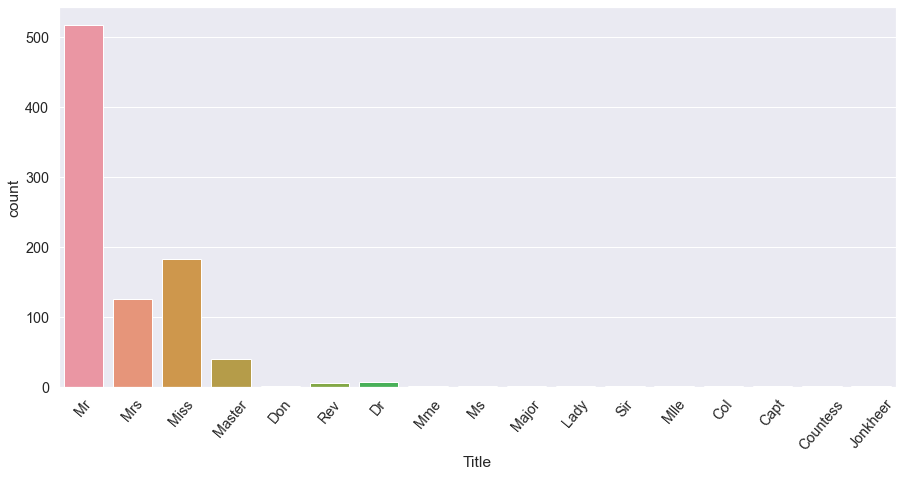

In [126]:
sns.set(rc={'figure.figsize': [15, 7]}, font_scale=1.3)
plt.xticks(rotation=50)
sns.countplot(x='Title',data=df_titanic)

### 2)

In [6]:
df_sendy['user_id']=df_sendy['User Id'].apply(lambda x: x.split('_')[2])
df_sendy.sample(5)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,user_id
19440,Order_No_14396,User_Id_3661,Bike,3,Business,22,2,12:43:24 PM,22,2,...,6,24.2,NaN,-1.213465,36.875527,-1.241332,36.878553,Rider_Id_111,812,3661
17646,Order_No_23692,User_Id_1588,Bike,3,Business,23,5,4:25:30 PM,23,5,...,5,24.8,NaN,-1.269534,36.806970,-1.255189,36.782203,Rider_Id_279,743,1588
13417,Order_No_24258,User_Id_393,Bike,3,Business,18,2,8:03:17 AM,18,2,...,4,NaN,NaN,-1.316711,36.830156,-1.300406,36.829741,Rider_Id_436,973,393
17170,Order_No_14989,User_Id_466,Bike,3,Personal,14,1,11:57:12 AM,14,1,...,9,23.3,NaN,-1.276833,36.807380,-1.231061,36.803578,Rider_Id_764,1223,466
18098,Order_No_4336,User_Id_393,Bike,3,Business,6,1,11:01:02 AM,6,1,...,11,NaN,NaN,-1.316711,36.830156,-1.263818,36.793006,Rider_Id_25,1758,393


## Task 4
### 1)

In [10]:
df_visit=pd.read_csv('dastasets\\visitor-interests.csv')
df_visit=df_visit.head(50)

In [11]:
df_visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IP         50 non-null     object
 1   UserAgent  50 non-null     object
 2   Country    50 non-null     object
 3   Languages  50 non-null     object
 4   Interests  50 non-null     object
dtypes: object(5)
memory usage: 2.1+ KB


In [25]:
def agent_info(x):
    ua=user_agents.parse(x)
    return pd.Series([ua.browser.family, ua.os.family, ua.device.family])

In [26]:
df_visit[['Browser','OS','Device']]=df_visit['UserAgent'].apply(agent_info)
df_visit.sample(5)

,IP,UserAgent,Country,Languages,Interests,Browser,OS,Device
5,1.124.48.210,Mozilla/5.0 (Linux; Android 5.0; SAMSUNG SM-G9...,AU,english,company,Samsung Internet,Android,Samsung SM-G900I
45,1.187.188.80,Mozilla/5.0 (Linux; U; Android 4.2.2; en-us; A...,IN,english,company,Android,Android,A550s IPS
35,1.162.51.164,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,TW,english,blog/personal homepage,Chromium,Ubuntu,Other
11,1.128.96.30,Mozilla/5.0 (iPhone; CPU iPhone OS 8_1_3 like ...,AU,english,company,Mobile Safari,iOS,iPhone
32,1.152.97.25,Mozilla/5.0 (iPhone; CPU iPhone OS 9_2_1 like ...,AU,english,company,Mobile Safari,iOS,iPhone


### 2)

In [60]:
def ip_data(IP):
    """
    Generates 2 DataFrame columns of (latitude and longitude) for pased in IP addresses
    """
    lat=ip2geo.get(IP, api_key='free').latitude
    lng=ip2geo.get(IP, api_key='free').longitude
    return pd.Series((lat,lng))

In [58]:
df_visit[['latitude','longitude']]=df_visit.loc[:50, 'IP'].apply(ip_data)
df_visit.sample(7)

,IP,UserAgent,Country,Languages,Interests,Browser,OS,Device,latitude,longitude
16,1.129.96.79,Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG SM-...,AU,english,company,Samsung Internet,Android,Samsung SM-T355Y,-33.768528,150.956856
21,1.132.96.203,Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_1 like ...,AU,english,company,Mobile Safari,iOS,iPhone,-28.002373,153.414599
17,1.129.96.86,Mozilla/5.0 (Linux; Android 6.0.1; SM-N915G Bu...,AU,english,company,Chrome Mobile,Android,Samsung SM-N915G,-33.768528,150.956856
26,1.144.96.77,Mozilla/5.0 (iPhone; CPU iPhone OS 9_2 like Ma...,AU,english,company,Mobile Safari,iOS,iPhone,-33.768528,150.956856
4,1.123.135.213,Mozilla/5.0 (iPad; CPU OS 9_3_5 like Mac OS X)...,AU,english,company,Mobile Safari,iOS,iPad,-33.768528,150.956856
37,1.164.141.85,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,TW,chinese,social network/forum,Dragon,Windows,Other,25.119312,121.798774
23,1.136.97.40,Mozilla/5.0 (iPhone; CPU iPhone OS 9_2 like Ma...,AU,english,company,Mobile Safari,iOS,iPhone,-37.814218,144.963161


## Task 5
### 1)

In [97]:
# Using lantitue and longitude columns created from last Task (4-2)
# Comparing with Cairo, Egypt (30.033333, 31.233334) - القصر العيني، قسم السيدة زينب، محافظة القاهرة‬
Egy_geo=(30.033333, 31.233334)
df_visit['Dist_From_Egypt']=df_visit.loc[2:].apply(geo_dist,axis=1,const=Egy_geo)
df_visit.sample(3)

,IP,UserAgent,Country,Languages,Interests,Browser,OS,Device,latitude,longitude,Dist_From_Egypt
28,1.152.96.14,Mozilla/5.0 (iPad; CPU OS 8_4 like Mac OS X) A...,AU,english,company/other,Mobile Safari,iOS,iPad,-37.814218,144.963161,13965.856625
25,1.144.96.234,Mozilla/5.0 (iPad; CPU OS 9_3_5 like Mac OS X)...,AU,english,company,Mobile Safari,iOS,iPad,-33.768528,150.956856,14391.080322
14,1.129.96.21,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...,AU,english,church,Chrome,Mac OS X,Mac,-27.968781,153.406670,14447.798364


In [90]:
def geo_dist(df,const):
    return great_circle((df['latitude'],df['longitude']),const).kilometers

In [95]:
# Above function did not apply on the first 2 records as their values for latitude and longitude are NaNs,
# -causing an exception (ValueError)
df_visit.head(2)

,IP,UserAgent,Country,Languages,Interests,Browser,OS,Device,latitude,longitude,Dist_From_Egypt
0,1.10.195.126,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,TH,english,other,Chrome,Windows,Other,NaN,NaN,NaN
1,1.1.217.211,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,TH,thai,blog/personal homepage,Chrome,Windows,Other,NaN,NaN,NaN
